<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Loading-Data" data-toc-modified-id="Loading-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading Data</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data cleaning</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#General" data-toc-modified-id="General-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>General</a></span></li><li><span><a href="#Influence-of-Methodology" data-toc-modified-id="Influence-of-Methodology-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Influence of Methodology</a></span></li><li><span><a href="#Influence-of-Profession" data-toc-modified-id="Influence-of-Profession-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Influence of Profession</a></span></li><li><span><a href="#Management-Problems" data-toc-modified-id="Management-Problems-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Management Problems</a></span></li></ul></li></ul></div>

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr, spearmanr,ks_2samp, ttest_ind

from corr_plot import *

# Loading Data

In [2]:
data = pd.read_csv('Data_Science_PM_survey.csv', sep=';')

data.columns = ['buss_underst_diff',
                'data_acq_expl_diff',
                'modeling_diff',
                'validation_diff',
                'deployment_diff',
                'monitoring_diff',
                'manag_problems',
                'delays_freq',
                'methodology',
                'profession',
                'submission_dt',
                'token']

# Functions

In [3]:
def onehot_declutter(df, col_in:str, sep:str =',', replace:bool = True):
    """ transforms a column with multiple string values into one hot encoding columns"""
    
    string_instances = {item.strip() for i in data[col_in] for item in i.split(sep)}
    
    for string in string_instances:
        df[string.replace(' ','_')] = [1 if string in i else 0 for i in df[col_in]]
    if replace:
        df.drop(columns = col_in, inplace = True)
    return df

def calculate_pvalues(df,method:str):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            if method == 'pearson':
                pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
            if method == 'spearman':
                pvalues[r][c] = round(spearmanr(df[r], df[c])[1], 4)
            
    return pvalues

# Data cleaning

In [4]:
data = onehot_declutter(data,'manag_problems',sep=',')

In [5]:
data.drop(columns = ['submission_dt','token','not_data_science_project_itself._None_of_these_apply_to_me.','The_options_are_very_biased_toward_management_issues'], inplace = True)

In [6]:
data.head()

,buss_underst_diff,data_acq_expl_diff,modeling_diff,validation_diff,deployment_diff,monitoring_diff,delays_freq,methodology,profession,Infrastructure,Poor_communication,The_amount_of_data,Useless_data_entries_made_by_users,Ill-defined_problem_or_business_objectives,Frequent_delays,Late/low_engagement_of_stakeholders,Ineffective_coordination_between_teams
0,9,8,4,6,7,5,9,CRISP-DM,Data Scientist,0,1,0,0,0,1,1,0
1,7,4,6,7,4,4,7,Kanban,Data Analyst,0,0,0,0,1,1,1,0
2,8,6,4,7,9,10,8,None,Data Scientist,0,0,0,0,1,0,1,1
3,8,9,3,7,7,3,10,Kanban,Manager,0,0,0,0,1,0,1,0
4,8,10,6,4,6,4,5,Scrum,Data Scientist,0,0,0,0,1,0,0,0


In [7]:
data.to_csv("cleaned_data.csv")

# EDA

## General

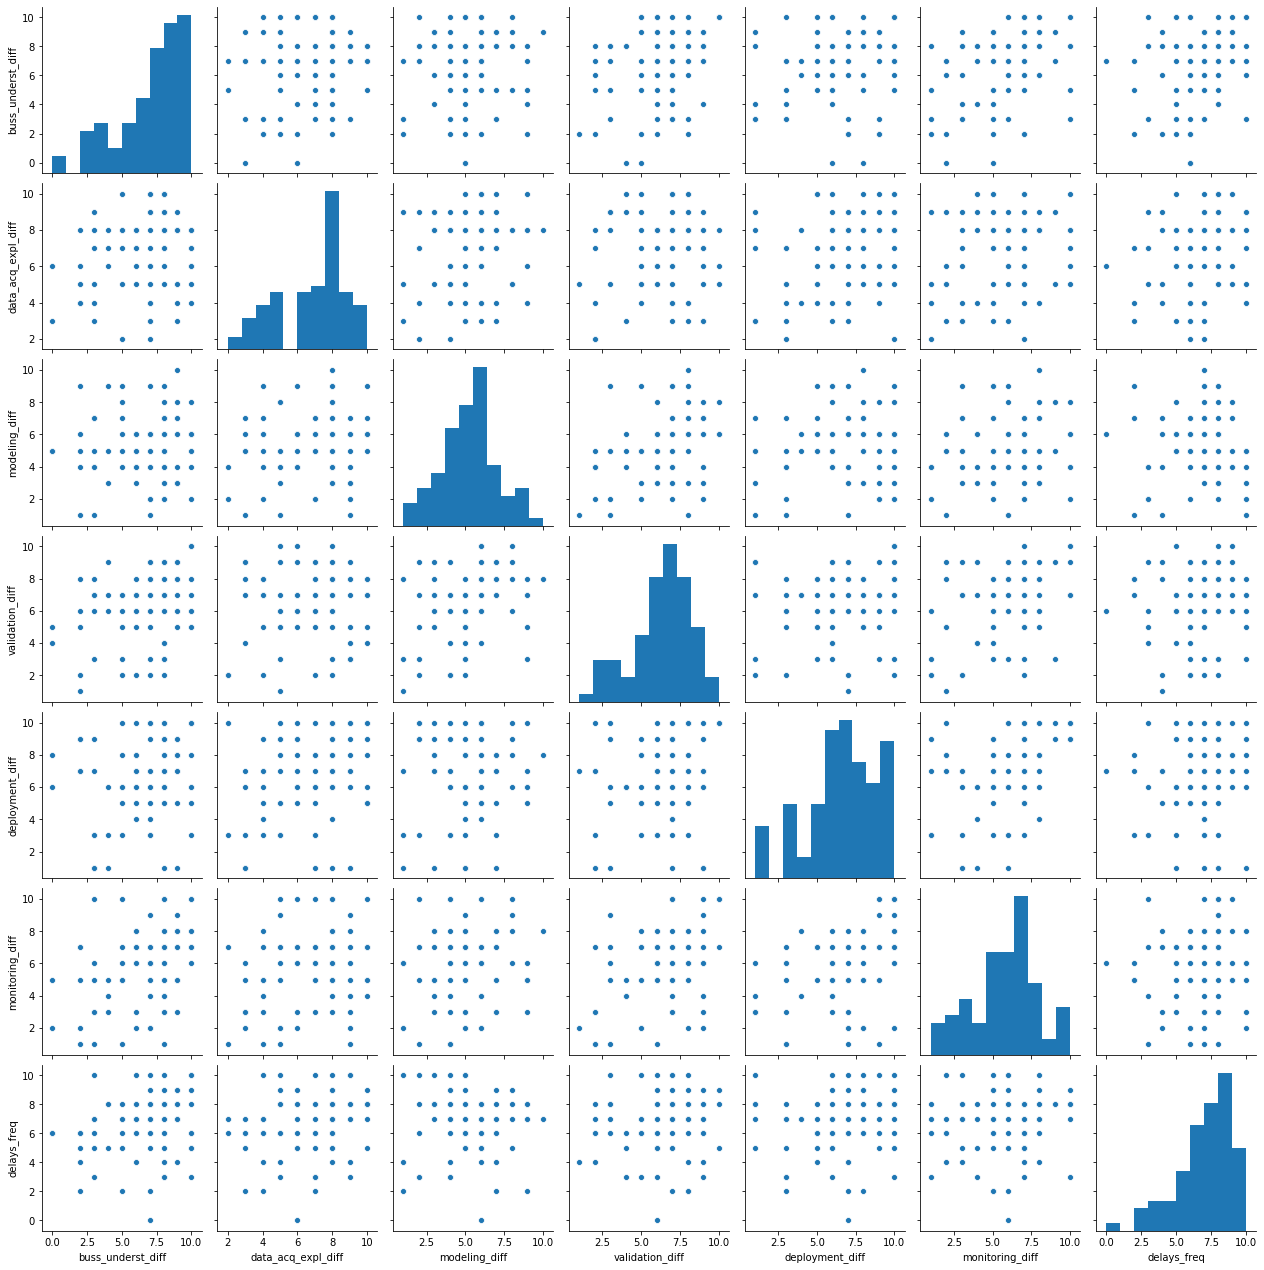

In [8]:
sns.pairplot(data.iloc[:,:7]);

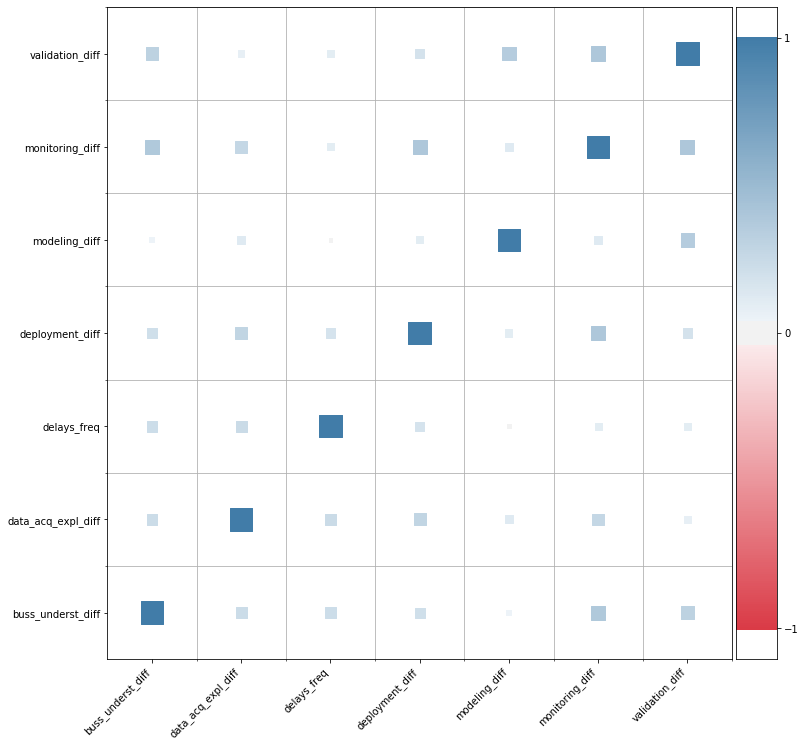

In [9]:
corr_heatmap(data.iloc[:,:7])

In [10]:
data.iloc[:,:7].corr(method='spearman')

,buss_underst_diff,data_acq_expl_diff,modeling_diff,validation_diff,deployment_diff,monitoring_diff,delays_freq
buss_underst_diff,1.000000,0.187206,0.062086,0.294899,0.214337,0.389381,0.252055
data_acq_expl_diff,0.187206,1.000000,0.098612,0.017636,0.274323,0.220830,0.285463
modeling_diff,0.062086,0.098612,1.000000,0.403378,0.049990,0.122030,-0.081470
validation_diff,0.294899,0.017636,0.403378,1.000000,0.210002,0.330198,0.156515
deployment_diff,0.214337,0.274323,0.049990,0.210002,1.000000,0.393476,0.268711
monitoring_diff,0.389381,0.220830,0.122030,0.330198,0.393476,1.000000,0.122359
delays_freq,0.252055,0.285463,-0.081470,0.156515,0.268711,0.122359,1.000000


In [11]:
calculate_pvalues(data.iloc[:,:7],'spearman')

,buss_underst_diff,data_acq_expl_diff,modeling_diff,validation_diff,deployment_diff,monitoring_diff,delays_freq
buss_underst_diff,0,0.0901,0.5771,0.0068,0.0517,0.0003,0.0215
data_acq_expl_diff,0.0901,0,0.3751,0.8743,0.0121,0.0448,0.0089
modeling_diff,0.5771,0.3751,0,0.0002,0.6536,0.2718,0.4641
validation_diff,0.0068,0.8743,0.0002,0,0.0567,0.0023,0.1577
deployment_diff,0.0517,0.0121,0.6536,0.0567,0,0.0002,0.014
monitoring_diff,0.0003,0.0448,0.2718,0.0023,0.0002,0,0.2705
delays_freq,0.0215,0.0089,0.4641,0.1577,0.014,0.2705,0


In [14]:
tb = data.iloc[:,:7].corr(method='spearman')
tb[calculate_pvalues(data.iloc[:,:7],'spearman')<0.091]

,buss_underst_diff,data_acq_expl_diff,modeling_diff,validation_diff,deployment_diff,monitoring_diff,delays_freq
buss_underst_diff,1.000000,0.187206,NaN,0.294899,0.214337,0.389381,0.252055
data_acq_expl_diff,0.187206,1.000000,NaN,NaN,0.274323,0.220830,0.285463
modeling_diff,NaN,NaN,1.000000,0.403378,NaN,NaN,NaN
validation_diff,0.294899,NaN,0.403378,1.000000,0.210002,0.330198,NaN
deployment_diff,0.214337,0.274323,NaN,0.210002,1.000000,0.393476,0.268711
monitoring_diff,0.389381,0.220830,NaN,0.330198,0.393476,1.000000,NaN
delays_freq,0.252055,0.285463,NaN,NaN,0.268711,NaN,1.000000


In [13]:
tb = data.iloc[:,:7].corr(method='spearman')
tb[calculate_pvalues(data.iloc[:,:7],'spearman')<0.05]

,buss_underst_diff,data_acq_expl_diff,modeling_diff,validation_diff,deployment_diff,monitoring_diff,delays_freq
buss_underst_diff,1.000000,NaN,NaN,0.294899,NaN,0.389381,0.252055
data_acq_expl_diff,NaN,1.000000,NaN,NaN,0.274323,0.220830,0.285463
modeling_diff,NaN,NaN,1.000000,0.403378,NaN,NaN,NaN
validation_diff,0.294899,NaN,0.403378,1.000000,NaN,0.330198,NaN
deployment_diff,NaN,0.274323,NaN,NaN,1.000000,0.393476,0.268711
monitoring_diff,0.389381,0.220830,NaN,0.330198,0.393476,1.000000,NaN
delays_freq,0.252055,0.285463,NaN,NaN,0.268711,NaN,1.000000


In [12]:
data.iloc[:,:7].corr()

,buss_underst_diff,data_acq_expl_diff,modeling_diff,validation_diff,deployment_diff,monitoring_diff,delays_freq
buss_underst_diff,1.000000,0.232139,0.048709,0.317157,0.208141,0.385492,0.227720
data_acq_expl_diff,0.232139,1.000000,0.127224,0.082175,0.289691,0.273214,0.246191
modeling_diff,0.048709,0.127224,1.000000,0.363851,0.103013,0.125680,-0.025240
validation_diff,0.317157,0.082175,0.363851,1.000000,0.185436,0.396763,0.102308
deployment_diff,0.208141,0.289691,0.103013,0.185436,1.000000,0.399410,0.181620
monitoring_diff,0.385492,0.273214,0.125680,0.396763,0.399410,1.000000,0.100896
delays_freq,0.227720,0.246191,-0.025240,0.102308,0.181620,0.100896,1.000000


In [13]:
calculate_pvalues(data.iloc[:,:7],'pearson')

,buss_underst_diff,data_acq_expl_diff,modeling_diff,validation_diff,deployment_diff,monitoring_diff,delays_freq
buss_underst_diff,0,0.0347,0.6619,0.0035,0.059,0.0003,0.0384
data_acq_expl_diff,0.0347,0,0.2517,0.4602,0.0079,0.0125,0.0249
modeling_diff,0.6619,0.2517,0,0.0007,0.3541,0.2576,0.8208
validation_diff,0.0035,0.4602,0.0007,0,0.0933,0.0002,0.3574
deployment_diff,0.059,0.0079,0.3541,0.0933,0,0.0002,0.1003
monitoring_diff,0.0003,0.0125,0.2576,0.0002,0.0002,0,0.3641
delays_freq,0.0384,0.0249,0.8208,0.3574,0.1003,0.3641,0


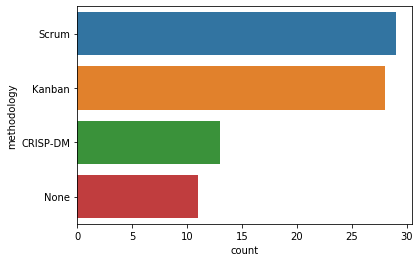

In [14]:
df_method = data[pd.DataFrame(data.methodology.tolist()).isin(['CRISP-DM','Kanban','None','Scrum']).any(1)]
order = df_method.methodology.value_counts().index

ax = sns.countplot(y="methodology",
                   data=df_method,
                   order = order)

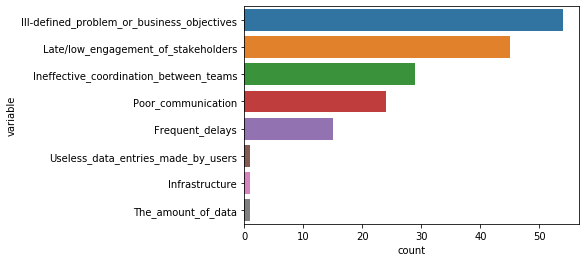

In [15]:
df_melted = pd.melt(data.iloc[:,9:])

order = df_melted[df_melted.value==1].variable.value_counts().index

sns.countplot(data=df_melted[df_melted.value==1], y='variable',order=order)

In [16]:
df_melted[df_melted.value==1].variable.value_counts()

Ill-defined_problem_or_business_objectives    54
Late/low_engagement_of_stakeholders           45
Ineffective_coordination_between_teams        29
Poor_communication                            24
Frequent_delays                               15
Useless_data_entries_made_by_users             1
Infrastructure                                 1
The_amount_of_data                             1
Name: variable, dtype: int64

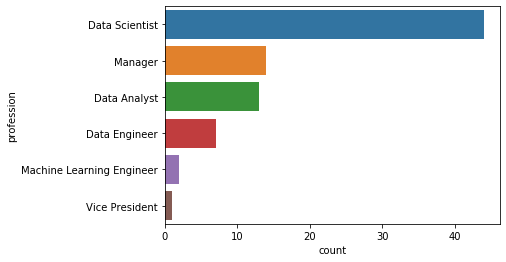

In [17]:
ax = sns.countplot(y="profession",
                   data=df_method,
                   order = df_method.profession.value_counts().index)

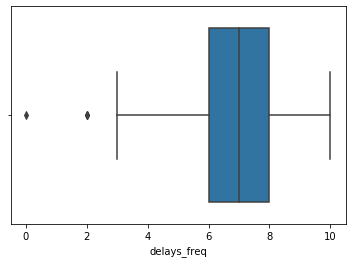

In [18]:
sns.boxplot(data.delays_freq)

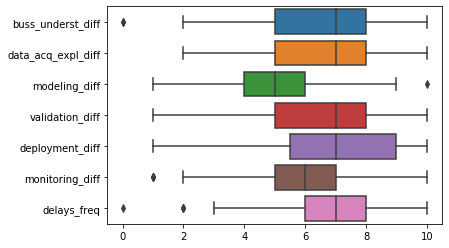

In [19]:
sns.boxplot( orient="h", data=data.iloc[:,:7])

In [20]:
data.iloc[:,:7].describe().T

,count,mean,std,min,25%,50%,75%,max
buss_underst_diff,83.0,6.662651,2.490358,0.0,5.0,7.0,8.0,10.0
data_acq_expl_diff,83.0,6.831325,2.094239,2.0,5.0,7.0,8.0,10.0
modeling_diff,83.0,5.240964,1.985253,1.0,4.0,5.0,6.0,10.0
validation_diff,83.0,6.409639,2.107108,1.0,5.0,7.0,8.0,10.0
deployment_diff,83.0,6.710843,2.491596,1.0,5.5,7.0,9.0,10.0
monitoring_diff,83.0,5.831325,2.315480,1.0,5.0,6.0,7.0,10.0
delays_freq,83.0,6.626506,2.076059,0.0,6.0,7.0,8.0,10.0


## Influence of Methodology

In [21]:
# droping methodologies that apear only once (Microsoft TDSP and QuantumBlackOne)

df_method = data[pd.DataFrame(data.methodology.tolist()).isin(['CRISP-DM','Kanban','None','Scrum']).any(1)]

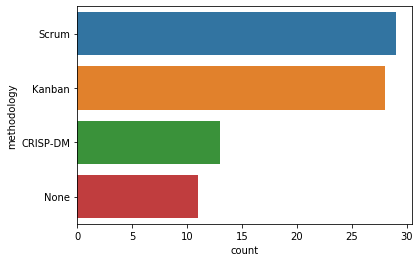

In [22]:
order = df_method.methodology.value_counts().index

ax = sns.countplot(y="methodology",
                   data=df_method,
                   order = order)

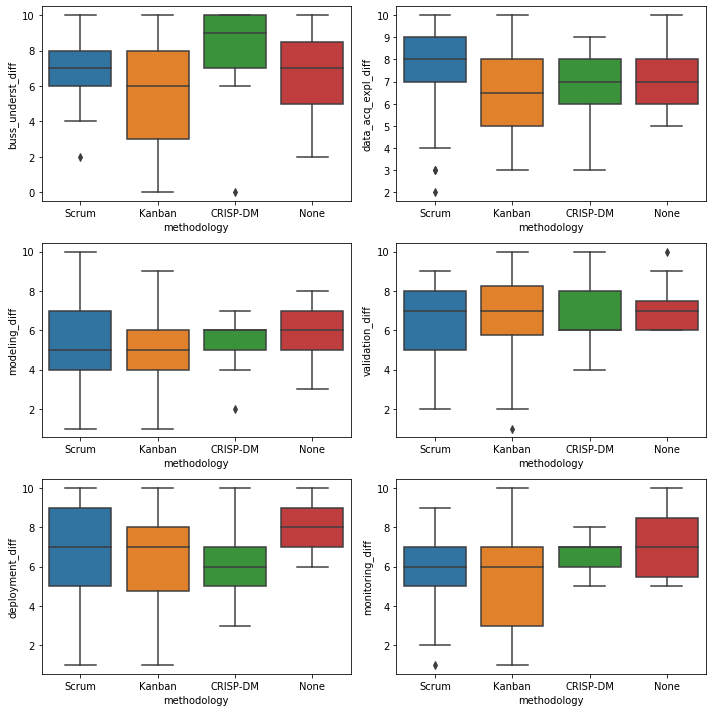

In [23]:
fig, axs = plt.subplots(ncols=2,nrows=3,figsize=(10,10))
axs = axs.flatten()
for ax,diff in zip(axs,df_method.iloc[:,:6]):
    sns.boxplot(x="methodology", y=diff, data=df_method, ax=ax, order = order);

plt.tight_layout()

Ks_2sampResult(statistic=0.367032967032967, pvalue=0.07756063392517432)


Ttest_indResult(statistic=1.8168447289726422, pvalue=0.08870827609782674)

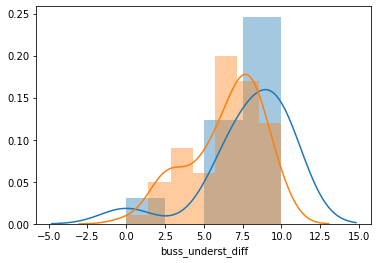

In [86]:
d0 = data[data['methodology']=='CRISP-DM'].buss_underst_diff
d1 = data[data['methodology']!='CRISP-DM'].buss_underst_diff


print(ks_2samp(d0,d1))

sns.distplot(d0)
sns.distplot(d1)


ttest_ind(d0, d1, equal_var = False)

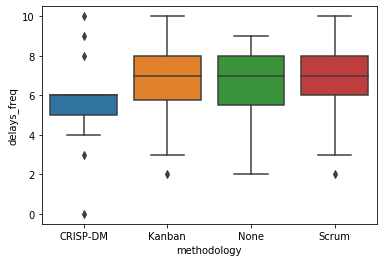

In [24]:
sns.boxplot(x="methodology", y='delays_freq', data=df_method);

Ks_2sampResult(statistic=0.493368700265252, pvalue=0.01619190599510123)


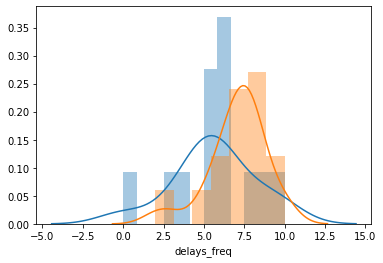

In [96]:
d0 = data[data['methodology']=='CRISP-DM'].delays_freq
d1 = data[data['methodology']=='Scrum'].delays_freq


print(ks_2samp(d0,d1))

sns.distplot(d0)
sns.distplot(d1)

In [97]:
ttest_ind(d0, d1, equal_var = False)

Ttest_indResult(statistic=-1.8533761324602267, pvalue=0.08093149646084108)

## Influence of Profession

In [27]:
df_prof = data[pd.DataFrame(data.profession.tolist()).isin(['Data Scientist', 'Data Analyst', 'Manager', 'Data Engineer', 'Machine Learning Engineer']).any(1)]

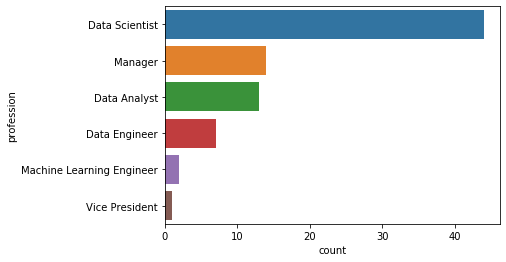

In [28]:
ax = sns.countplot(y="profession",
                   data=df_method,
                   order = df_method.profession.value_counts().index)

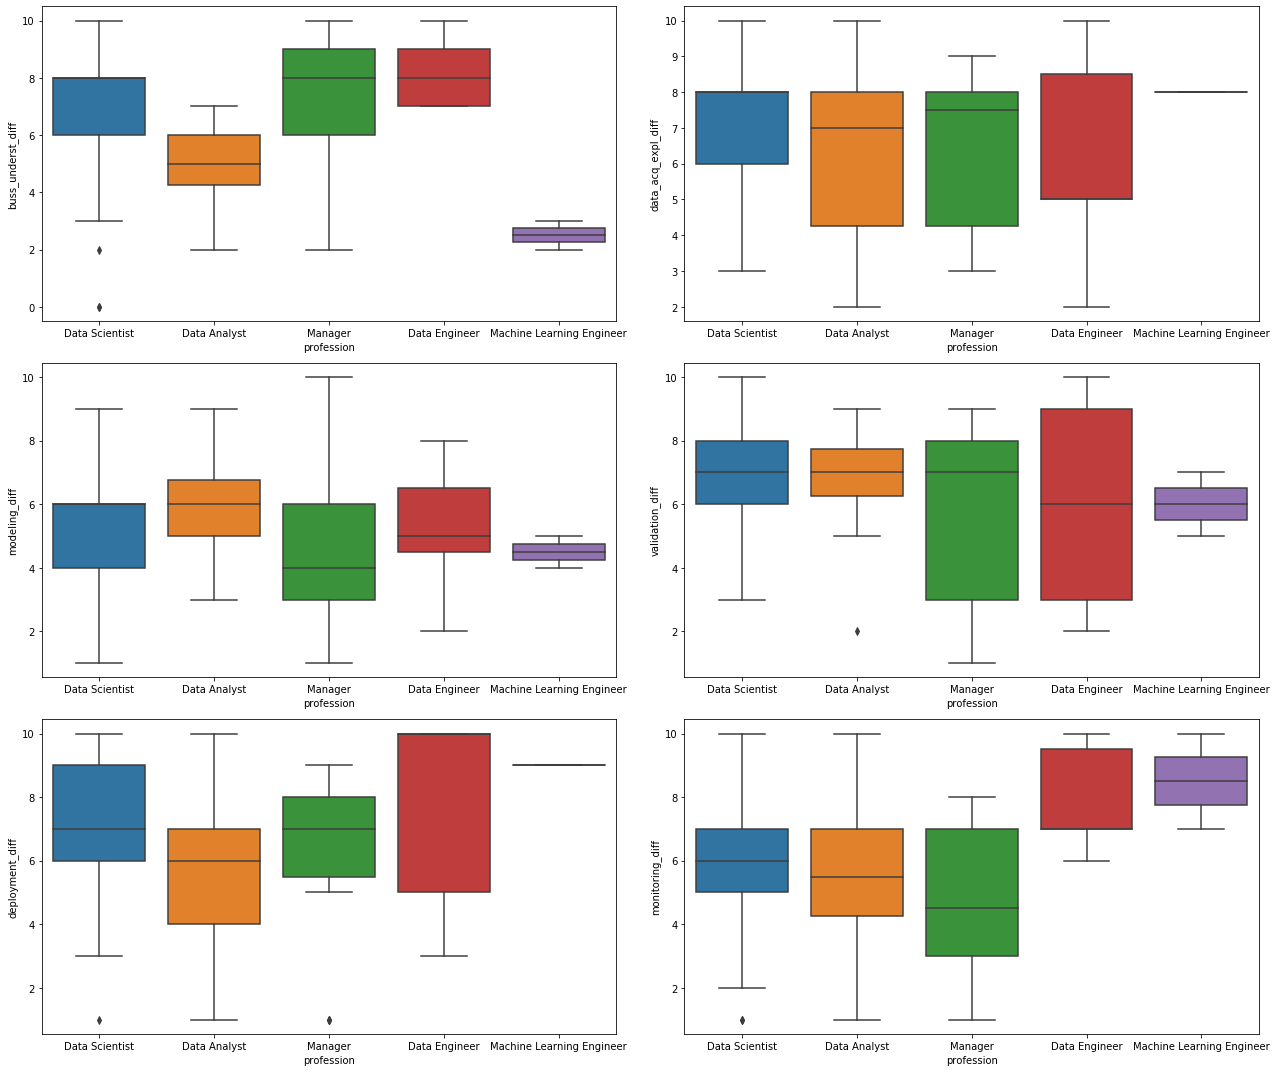

In [29]:
fig, axs = plt.subplots(ncols=2,nrows=3,figsize=(18,15))
axs = axs.flatten()
for ax,diff in zip(axs,df_prof.iloc[:,:6]):
    sns.boxplot(x="profession", y=diff, data=df_prof, ax=ax);

plt.tight_layout()

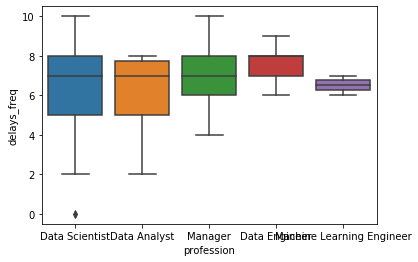

In [30]:
sns.boxplot(x="profession", y='delays_freq', data=df_prof);

In [31]:
#management
data.groupby('profession').agg({'Useless_data_entries_made_by_users':'mean',
                                 'Poor_communication':'mean',
                                 'The_amount_of_data':'mean',
                                 'Frequent_delays':'mean',
                                 'Infrastructure':'mean',
                                 'Ill-defined_problem_or_business_objectives':'mean',
                                 'Late/low_engagement_of_stakeholders':'mean',
                                 'Ineffective_coordination_between_teams':'mean'})

,Useless_data_entries_made_by_users,Poor_communication,The_amount_of_data,Frequent_delays,Infrastructure,Ill-defined_problem_or_business_objectives,Late/low_engagement_of_stakeholders,Ineffective_coordination_between_teams
profession,,,,,,,,
Data Analyst,0.000000,0.285714,0.000000,0.214286,0.000000,0.642857,0.285714,0.357143
Data Engineer,0.000000,0.142857,0.000000,0.000000,0.000000,0.428571,0.714286,0.285714
Data Scientist,0.000000,0.311111,0.022222,0.222222,0.022222,0.644444,0.577778,0.422222
Machine Learning Engineer,0.000000,0.500000,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000
Manager,0.071429,0.285714,0.000000,0.142857,0.000000,0.785714,0.642857,0.214286
Vice President,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000


In [32]:
#methodology
data_prof = onehot_declutter(data[['profession','methodology']], 'methodology',replace = False)
data_prof.groupby('profession').agg({'CRISP-DM':'mean',
                                                                                               'None':'mean',
                                                                                               'Kanban':'mean',
                                                                                               'Microsoft_TDSP':'mean',
                                                                                               'QuantumBlack_One':'mean',
                                                                                               'Scrum':'mean'})

/home/welberth/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,CRISP-DM,None,Kanban,Microsoft_TDSP,QuantumBlack_One,Scrum
profession,,,,,,
Data Analyst,0.071429,0.285714,0.214286,0.071429,0.000000,0.357143
Data Engineer,0.000000,0.142857,0.285714,0.000000,0.000000,0.571429
Data Scientist,0.244444,0.088889,0.333333,0.000000,0.022222,0.311111
Machine Learning Engineer,0.000000,0.000000,0.500000,0.000000,0.000000,0.500000
Manager,0.071429,0.142857,0.428571,0.000000,0.000000,0.357143
Vice President,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000


In [33]:
#methodology
data_prof2 = onehot_declutter(data[['profession','methodology']], 'profession',replace = False)
data_prof2.groupby('methodology').agg({'Data_Scientist':'mean',
                                       'Data_Analyst':'mean',
                                       'Manager':'mean',
                                       'Data_Engineer':'mean',
                                       'Machine_Learning_Engineer':'mean'})

/home/welberth/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Data_Scientist,Data_Analyst,Manager,Data_Engineer,Machine_Learning_Engineer
methodology,,,,,
CRISP-DM,0.846154,0.076923,0.076923,0.000000,0.000000
Kanban,0.535714,0.107143,0.214286,0.071429,0.035714
Microsoft TDSP,0.000000,1.000000,0.000000,0.000000,0.000000
None,0.363636,0.363636,0.181818,0.090909,0.000000
QuantumBlack One,1.000000,0.000000,0.000000,0.000000,0.000000
Scrum,0.482759,0.172414,0.172414,0.137931,0.034483


## Management Problems

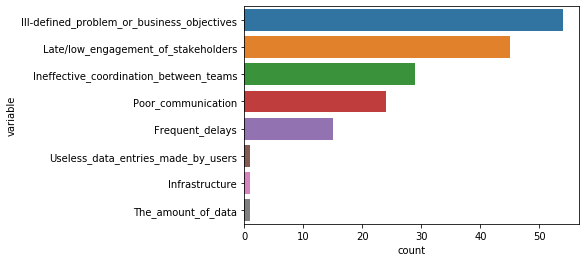

In [34]:
df_melted = pd.melt(data.iloc[:,9:])

order = df_melted[df_melted.value==1].variable.value_counts().index

sns.countplot(data=df_melted[df_melted.value==1], y='variable',order=order)

In [35]:
df_manag = df_method.iloc[:,:6].merge(data[df_melted.variable.unique()],left_index=True, right_index=True)


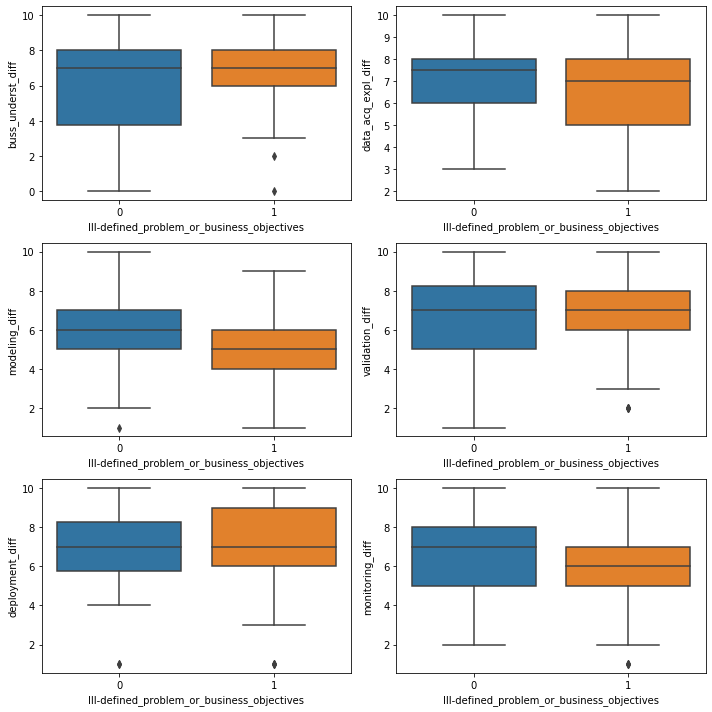

In [36]:
fig, axs = plt.subplots(ncols=2,nrows=3,figsize=(10,10))
axs = axs.flatten()

for ax,diff in zip(axs,df_manag.iloc[:,:6]):
    sns.boxplot(x="Ill-defined_problem_or_business_objectives", y=diff, data=df_manag, ax=ax);
    
plt.tight_layout()

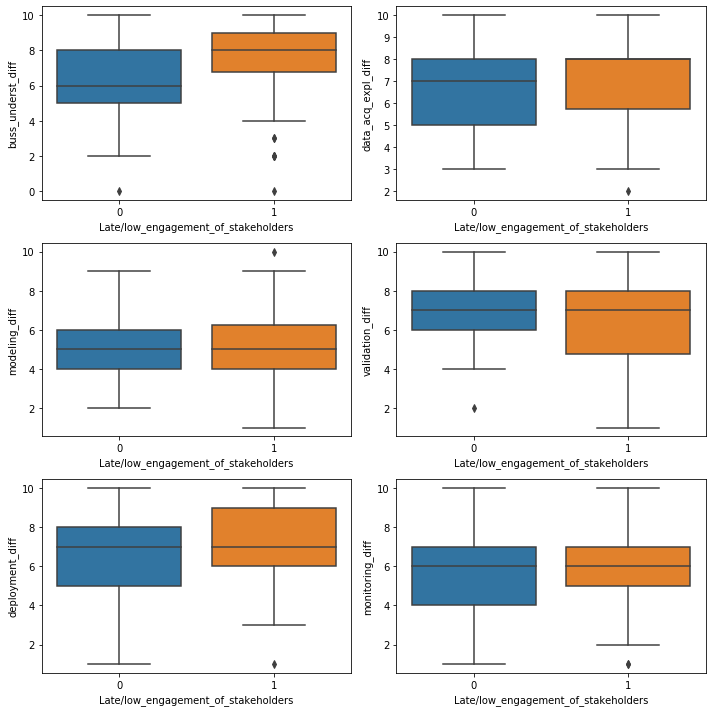

In [37]:
fig, axs = plt.subplots(ncols=2,nrows=3,figsize=(10,10))
axs = axs.flatten()

for ax,diff in zip(axs,df_manag.iloc[:,:6]):
    sns.boxplot(x="Late/low_engagement_of_stakeholders", y=diff, data=df_manag, ax=ax);
    
plt.tight_layout()

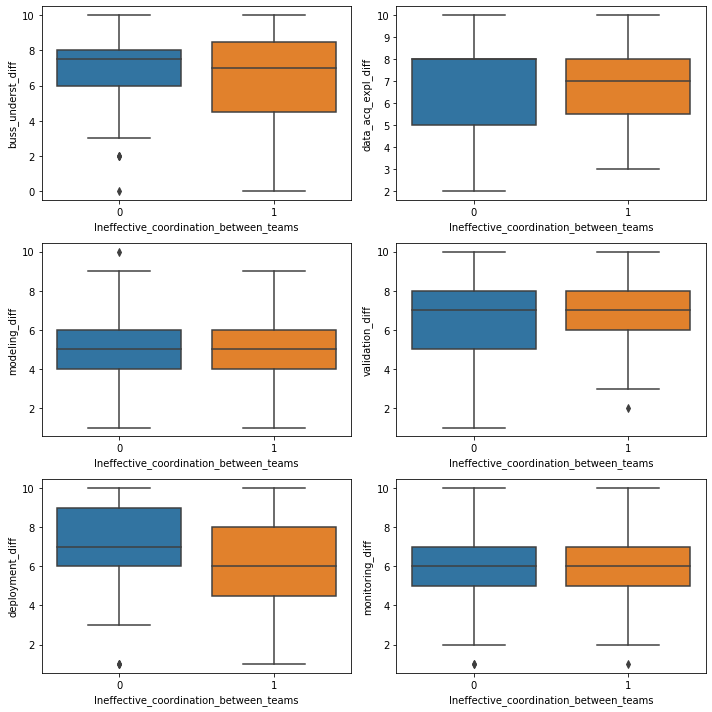

In [38]:
fig, axs = plt.subplots(ncols=2,nrows=3,figsize=(10,10))
axs = axs.flatten()

for ax,diff in zip(axs,df_manag.iloc[:,:6]):
    sns.boxplot(x="Ineffective_coordination_between_teams", y=diff, data=df_manag, ax=ax);
    
plt.tight_layout()

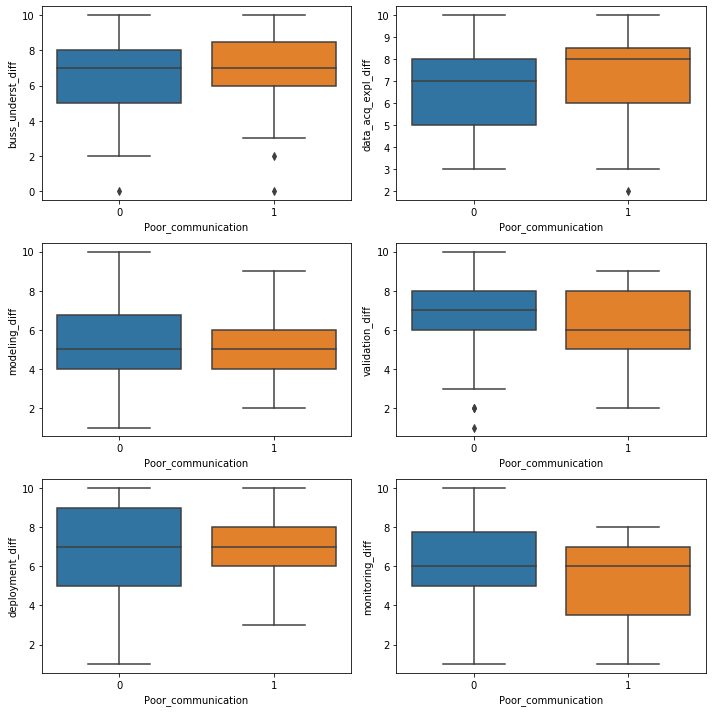

In [39]:
fig, axs = plt.subplots(ncols=2,nrows=3,figsize=(10,10))
axs = axs.flatten()

for ax,diff in zip(axs,df_manag.iloc[:,:6]):
    sns.boxplot(x="Poor_communication", y=diff, data=df_manag, ax=ax);
    
plt.tight_layout()

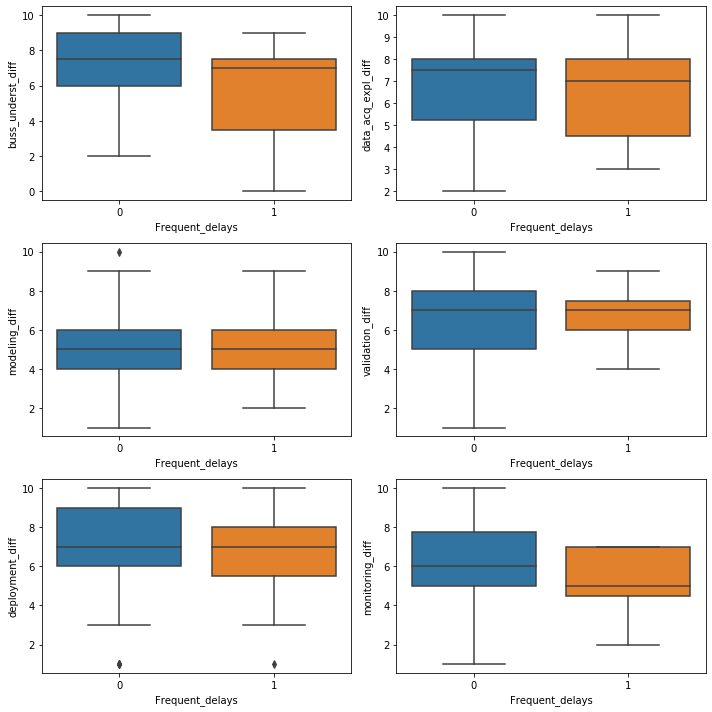

In [40]:

fig, axs = plt.subplots(ncols=2,nrows=3,figsize=(10,10))
axs = axs.flatten()

for ax,diff in zip(axs,df_manag.iloc[:,:6]):
    sns.boxplot(x="Frequent_delays", y=diff, data=df_manag, ax=ax);
    
plt.tight_layout()


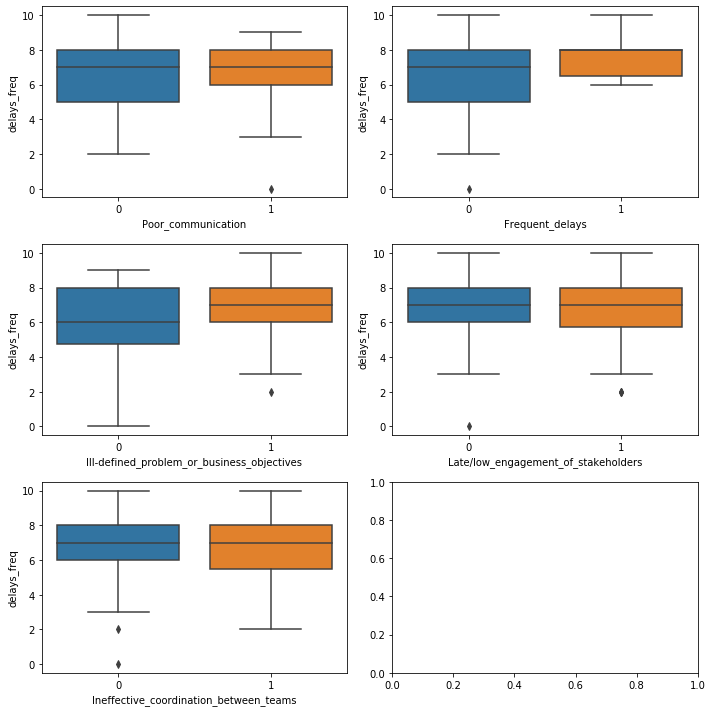

In [41]:
df_manag = df_manag.merge(data.delays_freq,left_index=True, right_index=True)


fig, axs = plt.subplots(ncols=2,nrows=3,figsize=(10,10))
axs = axs.flatten()

for ax,diff in zip(axs,df_manag[['Poor_communication','Frequent_delays','Ill-defined_problem_or_business_objectives','Late/low_engagement_of_stakeholders','Ineffective_coordination_between_teams']]):
    sns.boxplot(x=diff, y='delays_freq', data=df_manag, ax=ax);
    
plt.tight_layout()

In [42]:
#methodology
data.groupby('methodology').agg({'Useless_data_entries_made_by_users':'mean',
                                 'Poor_communication':'mean',
                                 'The_amount_of_data':'mean',
                                 'Frequent_delays':'mean',
                                 'Infrastructure':'mean',
                                 'Ill-defined_problem_or_business_objectives':'mean',
                                 'Late/low_engagement_of_stakeholders':'mean',
                                 'Ineffective_coordination_between_teams':'mean'})



,Useless_data_entries_made_by_users,Poor_communication,The_amount_of_data,Frequent_delays,Infrastructure,Ill-defined_problem_or_business_objectives,Late/low_engagement_of_stakeholders,Ineffective_coordination_between_teams
methodology,,,,,,,,
CRISP-DM,0.000000,0.307692,0.000000,0.230769,0.000000,0.615385,0.615385,0.384615
Kanban,0.035714,0.214286,0.000000,0.178571,0.035714,0.678571,0.535714,0.321429
Microsoft TDSP,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
None,0.000000,0.181818,0.090909,0.181818,0.000000,0.636364,0.363636,0.272727
QuantumBlack One,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
Scrum,0.000000,0.379310,0.000000,0.172414,0.000000,0.655172,0.586207,0.344828
